In [1]:
# Imports
import numpy as np 
import networkx as nx
from random import seed
import math
from networkx import karate_club_graph, to_numpy_matrix

In [2]:
def computematrixes (G):
    order = sorted(list(G.nodes()))
    A = nx.to_numpy_matrix(G, nodelist=order)
    I = np.eye(G.number_of_nodes())
    A_own = A + I
    D_own = np.array(np.sum(A_own, axis=0))[0]
    D_inv=D_own**(-.5)
    D_inv = np.matrix(np.diag(D_inv))
    return A_own,D_inv,I


In [3]:
def gcn_layer(A, D, X, W):
    feature=D * A * D * X * W
    feature=1 / (1 + np.exp(-feature))
    return feature

In [4]:
G= nx.Graph()
G.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,4), (2,5), (4,5)])
nx.draw(G, with_labels=True)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [5]:
seed(1)
W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
seed(1)
W2 = np.random.normal(loc=0, size=(W1.shape[1], 2))

In [6]:
A_own,D_inv,I= computematrixes (G)
H1 = gcn_layer(A_own, D_inv, I, W1)
H2 = gcn_layer(A_own, D_inv, H1, W2)

In [7]:
output=H2

In [8]:
feature_representations = {
    node: np.array(output)[node] 
    for node in G.nodes()}

In [9]:
feature_representations

{0: array([0.71061664, 0.25519359]),
 1: array([0.65245179, 0.30342327]),
 2: array([0.66258862, 0.22556656]),
 3: array([0.68424622, 0.30381681]),
 4: array([0.59854025, 0.26575417]),
 5: array([0.59854025, 0.26575417])}

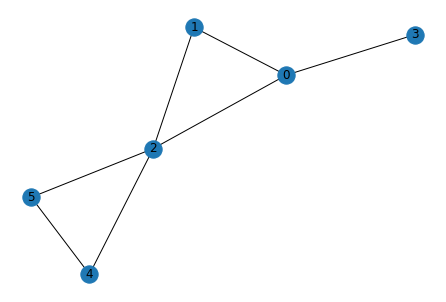

In [10]:
test= nx.Graph()
test.add_edges_from([(0,1), (0,2), (0,3), (1,2), (2,4), (2,5), (4,5)])
nx.draw(test, with_labels=True)

In [14]:
test_A_own,test_D_inv,test_I= computematrixes (test)
test_order = sorted(list(test.nodes()))
test_W1=np.empty((len(test_order),W1.shape[1]))
for i in range(len(test_order)):
    for j in range(W1.shape[1]):
        test_W1[i][j]=W1[test_order[i]][j]
test_H1= gcn_layer(test_A_own, test_D_inv, test_I, test_W1)
test_W2=W2
test_H2 = gcn_layer(test_A_own, test_D_inv, test_H1, test_W2)
test_H2

matrix([[0.71061664, 0.25519359],
        [0.65245179, 0.30342327],
        [0.66258862, 0.22556656],
        [0.68424622, 0.30381681],
        [0.59854025, 0.26575417],
        [0.59854025, 0.26575417]])

In [12]:
similarity_matrix=test_H2*H2.T
similarity_matrix

matrix([[0.57009977, 0.54107477, 0.52840963, 0.56376885, 0.49315142,
         0.49315142],
        [0.54107477, 0.51775902, 0.50074927, 0.53862276, 0.47115466,
         0.47115466],
        [0.52840963, 0.50074927, 0.48990395, 0.52190467, 0.45653121,
         0.45653121],
        [0.56376885, 0.53862276, 0.52190467, 0.56049754, 0.49028949,
         0.49028949],
        [0.49315142, 0.47115466, 0.45653121, 0.49028949, 0.42887571,
         0.42887571],
        [0.49315142, 0.47115466, 0.45653121, 0.49028949, 0.42887571,
         0.42887571]])

In [13]:
def maxelement(arr,p): 
    # get number of rows and columns 
    no_of_rows = len(arr) 
    no_of_column = len(arr[0]) 
    for i in range(no_of_rows):   
        # Initialize max1 to 0 at beginning 
        # of finding max element of each row 
        max1 = 0
        for j in range(no_of_column): 
            if arr[i][j] > max1 : 
                max1 = arr[i][j]
                p[i]=j
            #print(max1)
            #print(predicted_node[i])
    return p
actual_node = np.array(sorted(list(test.nodes())))
print("Actual Nodes: ")
print(actual_node)
predicted_node=np.zeros(len(actual_node))
predicted_node=maxelement(np.array(similarity_matrix),predicted_node)
print("Predicted Nodes: ")
print(predicted_node)

Actual Nodes: 
[0 1 2 3 4 5]
Predicted Nodes: 
[0. 0. 0. 0. 0. 0.]
